<H1><font color='green'>Working on EDA for Loan prediction data</font></H1>

In [1]:
# Mount your google drive to have access to data

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('drive/My Drive/trainLoanPrediction.csv')
print(df.head())
print(df.shape)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# We can notice LoanAmount and Credit_History have null values from above plot
# Lets check more for null counts in remaining columns as well

df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
# Few more libs to make things easier
!pip install missingno
!pip install pandas-profiling

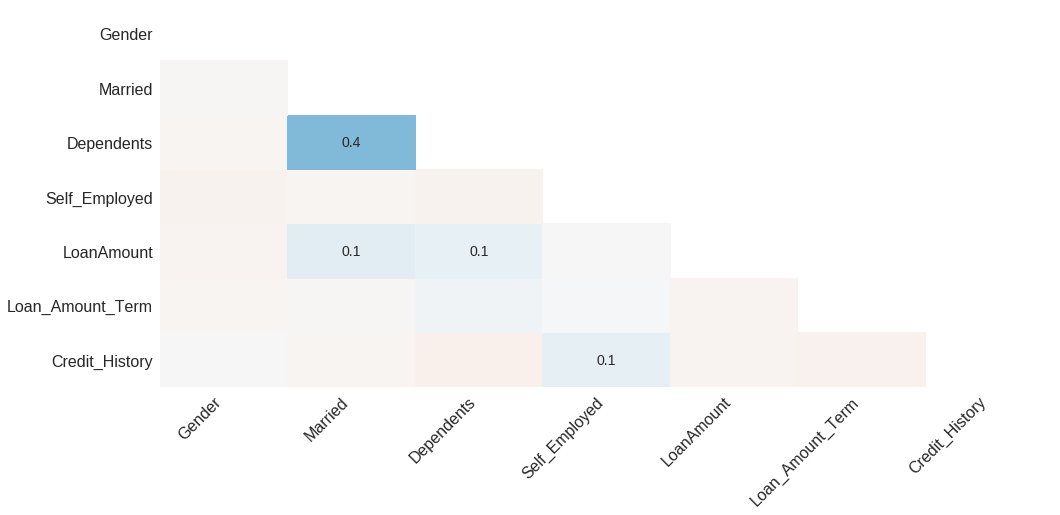

In [8]:
import missingno as msno
msno.heatmap(df, figsize=(16,7))
# The plot brings out no clear relation between missing values, you can go for matrix plot as well for similar analysis

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


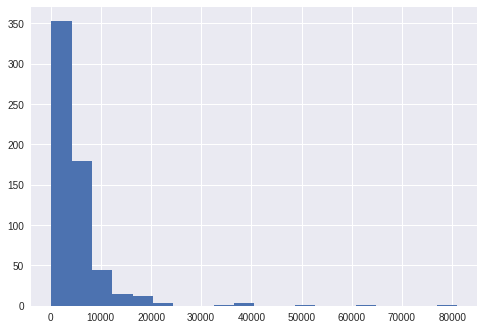

In [9]:
print(df.columns.values.tolist())
df['ApplicantIncome'].hist(bins=20)

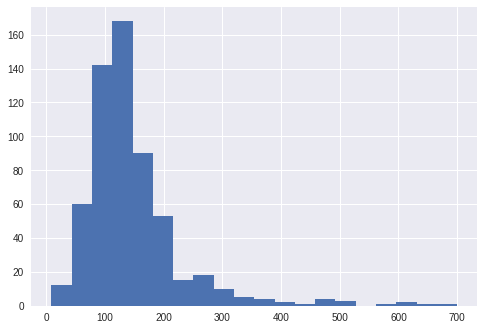

In [10]:
df['LoanAmount'].hist(bins=20)
# Both these plots show the data is very skewed on these columns

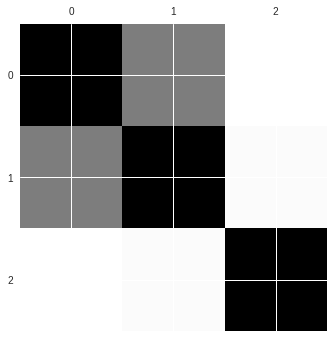

In [12]:
df['passed']= df.Loan_Status.eq('Y').mul(1)
plt.matshow(df[['LoanAmount', 'ApplicantIncome', 'passed']].corr())

# We can see a correlation between Loan amount and ApplicantIncome, which is very much expected

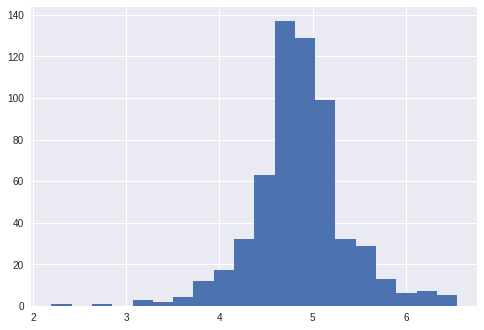

In [60]:
# Lets remove skew from LoanAmount and ApplicantIncome, by applying log transformation
df['LoanAmount'] = np.log(df['LoanAmount'])
df['LoanAmount'].hist(bins=20)
# LoanAmount became more or less normal

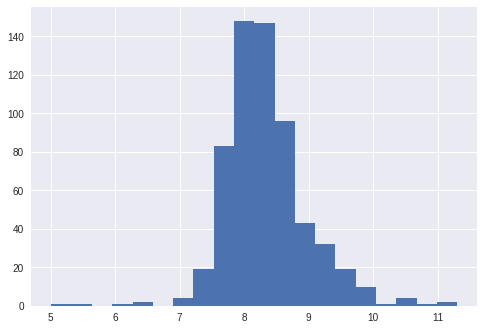

In [61]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['ApplicantIncome'].hist(bins=20)
# Similar behaviour

In [0]:
! pip install sklearn-pandas
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn_pandas import CategoricalImputer
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']

In [0]:
# Using categorical imputer for categorical columns to impute
genderImputer = CategoricalImputer()
df.Gender = genderImputer.fit_transform(df.Gender)

marriedImputer = CategoricalImputer()
df.Married = marriedImputer.fit_transform(df.Married)

dependentsImputer = CategoricalImputer()
df.Dependents = dependentsImputer.fit_transform(df.Dependents)

selfEmployedImputer = CategoricalImputer()
df.Self_Employed = selfEmployedImputer.fit_transform(df.Self_Employed)

loanTermImputer = CategoricalImputer()
df.Loan_Amount_Term = loanTermImputer.fit_transform(df.Loan_Amount_Term)

creditHistory = Imputer(strategy = 'most_frequent')
df.Credit_History = creditHistory.fit_transform(df.Credit_History.values.reshape(-1, 1))

# Using imputer for continuous column
loanAmountImputer = Imputer(strategy = 'mean')
df.LoanAmount = loanAmountImputer.fit_transform(df.LoanAmount.values.reshape(-1, 1))

In [0]:
# Lets go with LabelEncoding now
gender_le = LabelEncoder()
df.Gender = gender_le.fit_transform(df.Gender)

married_le = LabelEncoder()
df.Married = married_le.fit_transform(df.Married)

dependents_le = LabelEncoder()
df.Dependents = dependents_le.fit_transform(df.Dependents)

education_le = LabelEncoder()
df.Education = education_le.fit_transform(df.Education)

selfemp = LabelEncoder()
df.Self_Employed = selfemp.fit_transform(df.Self_Employed)

loan_term_le = LabelEncoder()
df.Loan_Amount_Term = loan_term_le.fit_transform(df.Loan_Amount_Term)

cred_hist_le = LabelEncoder()
df.Credit_History = cred_hist_le.fit_transform(df.Credit_History)

prop_area_le = LabelEncoder()
df.Property_Area = prop_area_le.fit_transform(df.Property_Area)

loan_status_le = LabelEncoder()
df.Loan_Status = loan_status_le.fit_transform(df.Loan_Status)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.15, 
   random_state = 11 , n_estimators = 100, max_depth = 2)

# No cross validation for now. Might come back again
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop(['Loan_ID', 'Loan_Status'], axis = 1), df['Loan_Status'], random_state = 11)

classifier.fit(Xtrain, Ytrain)
Ypred = classifier.predict(Xtest)
print(confusion_matrix(Ytest, Ypred))
print(accuracy_score(Ytest, Ypred))

[[ 44   0]
 [  0 110]]
1.0


In [0]:
# Lets load test data now and see what happens in field actually
dftest = pd.read_csv("drive/My Drive/testLoanPrediction.csv")

# Imputing
dftest.Gender = genderImputer.transform(dftest.Gender)
dftest.Married = marriedImputer.transform(dftest.Married)
dftest.Dependents = dependentsImputer.transform(dftest.Dependents)
dftest.Self_Employed = selfEmployedImputer.transform(dftest.Self_Employed)
dftest.LoanAmount = loanAmountImputer.transform(dftest.LoanAmount.values.reshape(-1, 1))
dftest.Loan_Amount_Term = loanTermImputer.transform(dftest.Loan_Amount_Term)
dftest.Credit_History = creditHistory.transform(dftest.Credit_History.values.reshape(-1, 1))

# Labelencoding
dftest.Gender = gender_le.transform(dftest.Gender)
dftest.Married = married_le.transform(dftest.Married)
dftest.Dependents = dependents_le.transform(dftest.Dependents)
dftest.Education = education_le.transform(dftest.Education)
dftest.Self_Employed = selfemp.transform(dftest.Self_Employed)

dftest.Credit_History = cred_hist_le.transform(dftest.Credit_History)
dftest.Property_Area = prop_area_le.transform(dftest.Property_Area)

# Faced two new values 6 and 350 while doing encoding on amount term, 
# lets replace these values with some values from original dataset. These values are clearly typos.
dftest.Loan_Amount_Term = dftest.Loan_Amount_Term.replace(6,12)
dftest.Loan_Amount_Term = dftest.Loan_Amount_Term.replace(350,360)
dftest.Loan_Amount_Term = loan_term_le.transform(dftest.Loan_Amount_Term)

Yfinal = classifier.predict(dftest.drop('Loan_ID', axis = 1))
Yfinal = pd.DataFrame(Yfinal)
Yfinal['Loan_ID'] = dftest.Loan_ID